In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error ,median_absolute_error,r2_score
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the file and printing the first 5
df = pd.read_csv("../data/cleaned_car_price_dataset.csv")

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1078.5,32,1242,2010,4,1,2,3.500000,186005.0,6,0,0,1,0,12,12
1,16621,1018.0,8,658,2011,4,0,5,3.000000,192000.0,6,2,0,1,0,1,8
2,8467,879.0,21,684,2006,3,0,5,1.300000,200000.0,4,3,1,1,1,1,2
3,3607,862.0,16,661,2011,4,1,2,2.500000,168966.0,4,0,0,1,0,14,0
4,11726,546.5,21,684,2014,3,1,5,1.300000,91901.0,4,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15720,470,645.0,58,1154,2011,3,1,2,1.800000,307325.0,4,0,1,1,0,12,12
15721,8467,879.0,36,385,1999,1,1,0,2.206404,300000.0,4,1,2,0,0,12,5
15722,15681,831.0,23,1334,2011,9,1,5,2.400000,161600.0,4,2,1,1,0,11,8
15723,26108,836.0,23,1442,2010,4,1,1,2.000000,116365.0,4,0,1,1,0,7,4


In [16]:
# Retrieve the mapping for each column
for col, categories in zip(categorical_columns, ordinal_encoder.categories_):
    mapping = {category: idx for idx, category in enumerate(categories)}
    print(f"Original to Encoded Mapping for '{col}': {mapping}")
    reverse_mapping = {idx: category for idx, category in enumerate(categories)}
    print(f"Encoded to Original Mapping for '{col}': {reverse_mapping}")

Original to Encoded Mapping for 'Manufacturer': {'ACURA': 0, 'ALFA ROMEO': 1, 'ASTON MARTIN': 2, 'AUDI': 3, 'BENTLEY': 4, 'BMW': 5, 'BUICK': 6, 'CADILLAC': 7, 'CHEVROLET': 8, 'CHRYSLER': 9, 'CITROEN': 10, 'DAEWOO': 11, 'DAIHATSU': 12, 'DODGE': 13, 'FERRARI': 14, 'FIAT': 15, 'FORD': 16, 'GAZ': 17, 'GMC': 18, 'GREATWALL': 19, 'HAVAL': 20, 'HONDA': 21, 'HUMMER': 22, 'HYUNDAI': 23, 'INFINITI': 24, 'ISUZU': 25, 'JAGUAR': 26, 'JEEP': 27, 'KIA': 28, 'LAMBORGHINI': 29, 'LANCIA': 30, 'LAND ROVER': 31, 'LEXUS': 32, 'LINCOLN': 33, 'MASERATI': 34, 'MAZDA': 35, 'MERCEDES-BENZ': 36, 'MERCURY': 37, 'MINI': 38, 'MITSUBISHI': 39, 'MOSKVICH': 40, 'NISSAN': 41, 'OPEL': 42, 'PEUGEOT': 43, 'PONTIAC': 44, 'PORSCHE': 45, 'RENAULT': 46, 'ROLLS-ROYCE': 47, 'ROVER': 48, 'SAAB': 49, 'SATURN': 50, 'SCION': 51, 'SEAT': 52, 'SKODA': 53, 'SSANGYONG': 54, 'SUBARU': 55, 'SUZUKI': 56, 'TESLA': 57, 'TOYOTA': 58, 'UAZ': 59, 'VAZ': 60, 'VOLKSWAGEN': 61, 'VOLVO': 62, 'ZAZ': 63, 'სხვა': 64}
Encoded to Original Mapping for '

In [6]:
# feature selection
X=df.drop(['Price','Color','Gear box type','Doors','Wheel','Fuel type','Drive wheels','Manufacturer'],axis=1)
X

,Levy,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,Cylinders,Airbags
0,1078.5,1242,2010,4,1,3.500000,186005.0,6,12
1,1018.0,658,2011,4,0,3.000000,192000.0,6,8
2,879.0,684,2006,3,0,1.300000,200000.0,4,2
3,862.0,661,2011,4,1,2.500000,168966.0,4,0
4,546.5,684,2014,3,1,1.300000,91901.0,4,4
...,...,...,...,...,...,...,...,...,...
15720,645.0,1154,2011,3,1,1.800000,307325.0,4,12
15721,879.0,385,1999,1,1,2.206404,300000.0,4,5
15722,831.0,1334,2011,9,1,2.400000,161600.0,4,8
15723,836.0,1442,2010,4,1,2.000000,116365.0,4,4


In [15]:
unique_values = X['Category'].unique()
print(unique_values)

[ 4  3  9  6  2 10  1  7  0  5  8]


In [17]:
# target selection
y = df['Price'].values.reshape(-1, 1)

scaler = StandardScaler()
y_standardized = scaler.fit_transform(y)

df['Price'] = y_standardized

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [8]:
df['Price']

0       -0.033003
1       -0.017369
2       -0.056081
3       -0.079154
4       -0.040608
           ...   
15720   -0.094047
15721   -0.056081
15722   -0.021832
15723    0.027672
15724   -0.094047
Name: Price, Length: 15725, dtype: float64

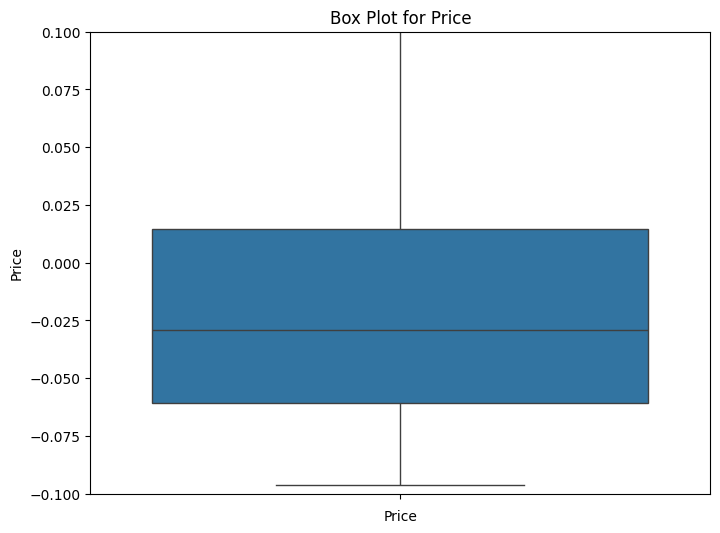

In [9]:
#Boxplot to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['Price'])
plt.title(f'Box Plot for Price')
plt.xlabel('Price')
plt.ylim(-.1,.1)
plt.show()

In [10]:
# spliting the data set
X_train, X_test, y_train, y_test = train_test_split(X,y_standardized,test_size=.2,random_state=42)

In [18]:
# normalizing the data
scl = StandardScaler()

X_train_scl = scl.fit_transform(X_train)
X_test_scl = scl.fit_transform(X_test)
# Save the scaler
joblib.dump(scl, 'scl.pkl')

['scl.pkl']

Linear_models ( LinearRegression , Lasso and Ridge)

In [12]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

models = [
    ['Linear Regression', LinearRegression()],
    ['Ridge Regression', Ridge()],
    ['Lasso Regression', Lasso()],
]

In [13]:
predictions = []

for name, model in models:
    model.fit(X_train_scl, y_train)
    y_pred = model.predict(X_test_scl)
    predictions.append((name, y_pred))
    

for name, y_pred in predictions:
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)


    


    print('Model:', name)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Squared Error: {mae:.2f}')
    print(f'Median Absolute Error: {medae:.2f}')

   

    print('--------------------------\n')

Model: Linear Regression
Mean Squared Error: 0.01
Mean Squared Error: 0.06
Median Absolute Error: 0.05
--------------------------

Model: Ridge Regression
Mean Squared Error: 0.01
Mean Squared Error: 0.06
Median Absolute Error: 0.05
--------------------------

Model: Lasso Regression
Mean Squared Error: 0.01
Mean Squared Error: 0.06
Median Absolute Error: 0.05
--------------------------



In [14]:
import joblib

# Loop through the trained models and find Linear Regression
for name, model in models:
    if name == 'Linear Regression':
        # Fit the model before accessing feature_names_in_
        model.fit(X_train_scl, y_train)  # Ensure model is fitted

        # Save the Linear Regression model
        modelbest = model
        joblib.dump(model, "../models/linear_regression_model.pkl")
        print(f"{name} model saved successfully!")

        # Check if feature_names_in_ exists and print it
        if hasattr(modelbest, 'feature_names_in_'):
            print("Feature names from model:", modelbest.feature_names_in_)
        else:
            print(f"{name} model doesn't have feature_names_in_ attribute.")

        break


Linear Regression model saved successfully!
Linear Regression model doesn't have feature_names_in_ attribute.
